# P1 (40pt): In the following code example explained in Lecture 6, https://colab.research.google.com/drive/13cof4XUULbUqO0s5h-cd17FskWjpyMkm, 

make the following changes to the neural network model sequentially in the example:
1.   Change the number of neurons on the hidden layer to 256 units. **(10pt)**
2.   Use the tanh activation (an activation that was popular in the early days of neural networks) instead of relu for the hidden layer. **(10pt)**
3.   Add an additional hidden layer with 256 units and tanh activation function. **(10pt)**

Retrain the newly defined model and evaluate the trained model on the testing dataset to get the accuracy. **(10pt)**  



In [1]:
# To get started, import tf.keras as part of your TensorFlow program setup:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape,test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
# Start to build model
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import Sequential
network = models.Sequential()
network.add(layers.Dense(256, activation='tanh', input_shape=(28 * 28,)))
network.add(layers.Dense(256, activation='tanh'))
network.add(layers.Dense(10, activation='softmax'))


In [4]:
# Settings of loss and optimizer 
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = 'accuracy')

In [5]:
# Reshape data into network expected
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
# Categorically encode the labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
# Start to train the nextwork
network.fit(train_images, train_labels, epochs=5, batch_size=128, verbose = 1)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3038 - accuracy: 0.9100
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1393 - accuracy: 0.9584
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0921 - accuracy: 0.9719
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0674 - accuracy: 0.9793
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0496 - accuracy: 0.9849


In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.9696


In [9]:
print('test_acc:', test_acc,2)

test_acc: 0.9696000218391418 2


# P2 (60pt): Write a Python code in Colab using NumPy, Panda, Scikit-Learn and Keras to complete the following tasks:
1.	Import the Auto MPG dataset using pandas.read_csv(), use the attribute names as explained in the dataset description as the column names, view the strings ‘?’ as the missing value, and whitespace (i.e., ‘\s+’) as the column delimiter. Print out the shape and first 5 rows of the DataFrame. **(5pt)**

    a.	Dataset source file: http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

    b.	Dataset description: http://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import numpy as np  
np.random.seed(100)

tf.random.set_seed(100)

In [34]:
from os import readlink
# put your answer here
names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
mpg = pd.read_csv(url, sep='\s+', names= names, header=None, na_values=['?'])
print(mpg.shape)
mpg.head(5)

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


2.	Delete the “car_name” column using .drop() and drop the rows containing NULL value using .dropna(). Print out the shape of the DataFrame. **(5pt)**

In [35]:
# put your answer here
mpg.drop(columns = ['car_name'], inplace = True)
mpg.dropna()
mpg.shape

(398, 8)

In [36]:
mpg.fillna(mpg.mean(),inplace = True)
mpg.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

3.	For the ‘origin’ column with categorical attribute, replace it with the columns with numerical attributes using one-hot encoding. Print out the shape and first 5 rows of the new DataFrame. **(5pt)**

In [37]:
# put your answer here
mpg_new = pd.get_dummies(mpg, columns=["origin"])
mpg_new.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


4.	Separate the “mpg” column from other columns and view it as the label vector and others as the feature matrix. Split the data into a training set (80%) and testing set (20%) using train_test_split and print out their shapes. Print out the statistics of your training feature matrix using .describe().  **(5pt)**

In [38]:
from sklearn.model_selection import train_test_split

# put your answer here
X_col = mpg_new.columns.drop('mpg')
X = mpg_new[X_col]
y = mpg_new['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.describe()


(318, 9) (80, 9) (318,) (80,)


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,5.430818,191.397799,104.035682,2949.808176,15.449057,76.012579,0.613208,0.198113,0.188679
std,1.707266,104.068891,38.220830,850.651135,2.703984,3.719651,0.487783,0.399206,0.391870
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,98.500000,76.000000,2216.000000,13.700000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,141.000000,95.000000,2764.500000,15.350000,76.000000,1.000000,0.000000,0.000000
75%,8.000000,262.000000,124.250000,3533.750000,17.000000,79.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


5.	Normalize the feature columns in both training and testing datasets so that their means equal to zero and variances equal to one. Note that the testing set can only be scaled by the mean and standard deviation values obtained from the training set. Describe the statistics of your normalized feature matrix of training dataset using .describe() in Pandas. **(5pt)**


*   Option 1: You can follow the normalization steps in the code example of “Predicting house prices: a regression example” in Lecture 6.  

*   Option 2: You can use StandardScaler() in Scikit-Learn as in Homework 2 but you may need to transform a NumPy array back to Pandas DataFrame using pd.DataFrame() before calling .describe(). 




In [39]:
# put your answer here
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

X_train.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
count,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02
mean,1.515210e-16,-8.937644e-17,-4.259346e-16,1.878302e-16,4.038698e-15,1.012468e-16,8.518692e-17,2.269324e-17,1.169575e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.423807e+00,-1.185732e+00,-1.518431e+00,-1.529191e+00,-2.754845e+00,-1.616436e+00,-1.257132e+00,-4.962680e-01,-4.814840e-01
25%,-8.380754e-01,-8.926568e-01,-7.335184e-01,-8.626429e-01,-6.468443e-01,-8.099089e-01,-1.257132e+00,-4.962680e-01,-4.814840e-01
50%,-8.380754e-01,-4.842734e-01,-2.364073e-01,-2.178427e-01,-3.663358e-02,-3.381666e-03,7.929601e-01,-4.962680e-01,-4.814840e-01
75%,1.504852e+00,6.784179e-01,5.288822e-01,6.864645e-01,5.735772e-01,8.031456e-01,7.929601e-01,-4.962680e-01,-4.814840e-01
max,1.504852e+00,2.532959e+00,3.295698e+00,2.574724e+00,3.458210e+00,1.609673e+00,7.929601e-01,2.008704e+00,2.070381e+00


6.	Build a sequential neural network model in Keras with two densely connected hidden layers (32 neurons and ReLU activation function for each hidden layer), and an output layer that returns a single, continuous value. Print out the model summary using .summary(). **(10pt)**

*   Hint: You can follow the “Classifying movie reviews” example in Lecture 6, but need to change input_shape and last layer activation function correctly in the model definition.

In [40]:
# put your answer here
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                320       
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


7.	Define the appropriate loss function, optimizer, and metrics for this specific problem and compile the NN model. **(10pt)**

In [42]:
# put your answer here
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
#model.compile(loss = 'mse', optimizer = tf.keras.optimizers.RMSprop(0.001), metrics = ['mae','mse'])

8.	Put aside 20% of the normalized training data as the validation dataset by setting validation_split = 0.2 and set verbose = 0 to compress the model training status in Keras .fit(). Train the NN model for 100 epochs and batch size of 32 and plot the training and validation loss progress with respect to the epoch number. **(10pt)**

* Remember to use GPU for training in Colab. Otherwise, you may find out of memory error or slow execution.   

* There is no need to do K-fold cross-validation for this step. 

In [19]:
# put your answer here
num_val_samples = round(len(X_train)*.2)

X_val = X_train[:num_val_samples]
partial_X_train = X_train[num_val_samples:]

y_val = y_train[:num_val_samples]
partial_y_train = y_train[num_val_samples:]

dataset = mod1.fit(X_train, y_train, validation_split = 0.2, epochs = 100, batch_size = 32, verbose = 0, validation_data=(X_test, y_test))

In [43]:
dataset = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, batch_size = 32, verbose = 0, validation_data=(X_test, y_test))

In [44]:
dataset_dict = dataset.history
dataset_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

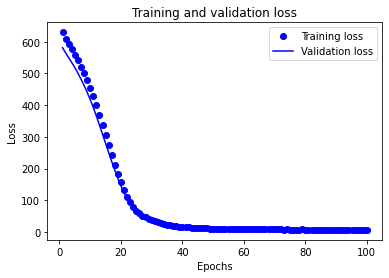

In [45]:
import matplotlib.pyplot as plt

mae = dataset.history['mae']
mae_val = dataset.history['val_mae']
loss = dataset.history['loss']
loss_val = dataset.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

9.	Use the trained NN model to make predictions on the normalized testing dataset and observe the prediction error. **(5pt)** 

In [20]:
# put your answer here
model.fit(partial_X_train, partial_y_train,epochs=4, batch_size=1, verbose=0)
val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)
val_mse, val_mae

(12.776471138000488, 2.544049024581909)